## **Imports**

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification , make_regression , make_circles
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler

## **Make dataset**

In [2]:
x , y = make_classification(n_samples=1000 , n_features=2 , n_clusters_per_class=1 ,
                            n_redundant=0 , random_state=13 , class_sep=2 , n_classes=2)
x.shape , y.shape

((1000, 2), (1000,))

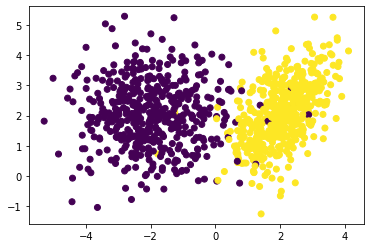

In [3]:
plt.scatter(x[: , 0] , x[: , 1] , c=y);

## **Activation Functions**

In [4]:
def linear(x):
    return x

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [6]:
def relu(x):
    return np.maximum(0, x)

In [7]:
def Tanh(x):
    return (np.exp(x)-np.exp(-x)) / (np.exp(x)+np.exp(-x))

## **Loss Functions**

In [8]:
def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

In [9]:
def bce(y, y_hat):
    return np.mean(-(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))

## **Score**

In [10]:
def Accuracy(y , y_hat , t=0.5):
    y_hat = np.where(y_hat < t , 0 , 1)
    y_hat = y_hat.ravel()
    acc = np.sum(y == y_hat) / len(y)
    return acc

In [11]:
def r2(y, y_hat):
    y_hat = y_hat.ravel()
    return 1 - np.sum((y - y_hat)**2) / np.sum((y - y.mean())**2)

## **Neuron From Scrach (OOP Style)**

In [12]:
class Neuron:
    
    # by defult af is None that return Linear Activation Function
    def __init__(self, in_features , af=sigmoid , n_iter=500 , loss_fn=bce , eta=0.1 ,
                 verbose=True , validation = True , valid_size=0.2 , t_score=Accuracy): 
        
        self.in_features = in_features
        # Weight & bias
        self.w = np.random.randn(in_features , 1)
        self.b = np.random.randn()
        # Register af
        self.af = af
        self.n_iter = n_iter
        self.loss_fn = loss_fn
        self.eta = eta
        self.t_score = t_score
        self.verbose = verbose
        self.valid_size = valid_size
        self.validation = validation
        self.loss_hist = []
        self.train_loss_hist = []
        self.valid_loss_hist = []
        self.w_grad , self.b_grad = None , None
        
    def fit(self , x , y):
        if self.validation:
            x_train , x_valid , y_train , y_valid = train_test_split(x , y , test_size=self.valid_size , random_state = 0)
            for i in range(self.n_iter):
                # model
                y_hat_train = self.predict(x_train)
                # train loss
                train_loss = self.loss_fn(y_train , y_hat_train)
                # train loss hist
                self.train_loss_hist.append(train_loss)
                # grad
                self.gradient(x_train , y_train , y_hat_train)
                # Opt
                self.gradient_descent()
                
                #Evaluate
                y_hat_valid = self.predict(x_valid)
                valid_loss = self.loss_fn(y_valid , y_hat_valid)
                self.valid_loss_hist.append(valid_loss)
        
                if self.verbose & (i % 10 == 0):
                    print(f'Iter={i}, Loss Train={train_loss:.4} , Loss valid={valid_loss:.4}')
        else:
            for i in range(self.n_iter):
                
                # model
                y_hat = self.predict(x)
                # loss
                loss = self.loss_fn(y , y_hat)
                # loss hist
                self.loss_hist.append(loss)
                # grad
                self.gradient(x , y , y_hat)
                # Opt
                self.gradient_descent()
                # output
                if self.verbose & (i % 10 == 0):
                    print(f'Iter: {i} , Loss: {loss:.4f}')
            
    
    def gradient(self , x , y , y_hat):
        self.w_grad = (x.T @ (y_hat - y)) /len(y)
        self.b_grad = (y_hat - y).mean()
        
    
    def gradient_descent(self):
        self.w -= self.eta * self.w_grad
        self.b -= self.eta * self.b_grad
        
        
    def predict(self , x):
        # x: [n_samples , n_featues]
        y_hat = x @ self.w + self.b
        y_hat = y_hat if self.af is None else self.af(y_hat)
        return y_hat
        
    def score(self , x , y):
        y_hat_f = self.predict(x)
        return self.t_score(y , y_hat_f)
    
    # Out message
    def __repr__(self):
        return f'MLP ({self.in_features} {self.af.__name__})'
    
    def parameters(self):
        return {'w':self.w , 'b':self.b}

## **Define Neuron**

In [13]:
Neuron = Neuron(2)
print(Neuron)
print(Neuron.parameters())

MLP (2 sigmoid)
{'w': array([[-0.48688753],
       [ 0.38680077]]), 'b': 0.6525851527922448}


## **Train Neuron**

In [14]:
Neuron.fit(x , y[: , None])

Iter=0, Loss Train=1.502 , Loss valid=1.306
Iter=10, Loss Train=0.3868 , Loss valid=0.3428
Iter=20, Loss Train=0.2346 , Loss valid=0.2076
Iter=30, Loss Train=0.1857 , Loss valid=0.1608
Iter=40, Loss Train=0.1611 , Loss valid=0.1365
Iter=50, Loss Train=0.1462 , Loss valid=0.1214
Iter=60, Loss Train=0.1361 , Loss valid=0.1111
Iter=70, Loss Train=0.1288 , Loss valid=0.1035
Iter=80, Loss Train=0.1232 , Loss valid=0.09771
Iter=90, Loss Train=0.1189 , Loss valid=0.0931
Iter=100, Loss Train=0.1154 , Loss valid=0.08935
Iter=110, Loss Train=0.1125 , Loss valid=0.08623
Iter=120, Loss Train=0.1101 , Loss valid=0.08358
Iter=130, Loss Train=0.1081 , Loss valid=0.08132
Iter=140, Loss Train=0.1063 , Loss valid=0.07935
Iter=150, Loss Train=0.1048 , Loss valid=0.07763
Iter=160, Loss Train=0.1034 , Loss valid=0.0761
Iter=170, Loss Train=0.1023 , Loss valid=0.07474
Iter=180, Loss Train=0.1012 , Loss valid=0.07352
Iter=190, Loss Train=0.1003 , Loss valid=0.07242
Iter=200, Loss Train=0.09944 , Loss valid=0

## **Visualization Results**

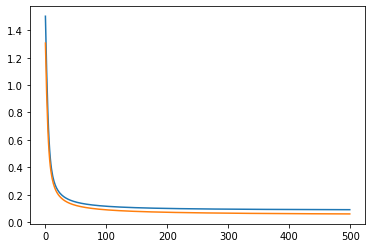

In [15]:
plt.plot(Neuron.train_loss_hist);
plt.plot(Neuron.valid_loss_hist);

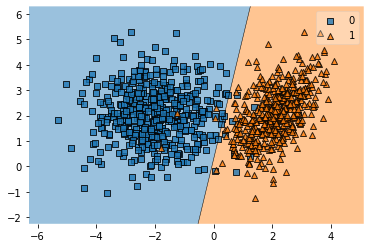

In [16]:
plot_decision_regions(x , y , clf=Neuron);

In [17]:
Neuron.score(x , y)

0.983

## **MLP**

<img src="imgs/mlp-code.png" alt="string indexing" width=400 align="center" />

In [174]:
class MLP:
    
    def __init__(self, hidden_layer_sizes, hidden_activation='relu', 
                 output_size=1, output_activation='sigmoid', 
                 n_iter=1000, loss_fn=bce, eta=0.1 , random_state=4):
        np.random.seed(random_state)
        self.hidden_layer_sizes = hidden_layer_sizes  # List of hidden layer sizes
        self.hidden_activation = hidden_activation  # Activation function for hidden layers
        self.output_size = output_size  # Output layer size
        self.output_activation = output_activation  # Activation function for output layer
        self.n_iter = n_iter  # Number of iterations for training
        self.loss_fn = loss_fn  # Loss function for training
        self.eta = eta  # Learning rate
        self.loss_hist = []
        self.random_state = random_state
        
        
    def _init_weights(self):
        self.ws, self.bs = [], []  # Weight and bias lists for each layer
        all_layers = [self.input_size] + self.hidden_layer_sizes + [self.output_size]  # All layer sizes
        num_layers = len(all_layers)
        for i in range(1, num_layers):
            w = np.random.randn(all_layers[i-1], all_layers[i])  # Randomly initialize weights
            b = np.random.randn(all_layers[i])  # Randomly initialize biases
            self.ws.append(w)
            self.bs.append(b)
    
    def fit(self, x, y):
        n, self.input_size = x.shape  # Number of samples and input size
        self._init_weights()
        for _ in range(self.n_iter):
            y_hat = self.predict(x)  # Make predictions
            loss = self.loss_fn(y, y_hat)  # Compute loss
            self._gradient_descent(x, y, y_hat)  # Update weights and biases
            self.loss_hist.append(loss)  
        
    def _gradient_descent(self, x, y, y_hat):
        delta = y_hat - y  # Compute difference between predicted and true values
        for j in range(len(self.ws)-1, 0, -1):
            w_grad = (self.as_[j-1].T @ delta) / len(y)  # Compute weight gradient
            b_grad = delta.mean(0)  # Compute bias gradient
            self.ws[j] -= self.eta * w_grad  # Update weights
            self.bs[j] -= self.eta * b_grad  # Update biases
            delta = (delta @ self.ws[j].T) * (self._activation_derivative(self.hs[j-1], self.hidden_activation))
            
    def predict(self, x):
        self.hs = []  # Hidden layer outputs
        self.as_ = []  # Activation function outputs
        for i, (w, b) in enumerate(zip(self.ws[:-1], self.bs[:-1])):
            a = self.as_[i-1].copy() if i>0 else x.copy()  # Input to the hidden layer
            self.hs.append(a @ w + b)  # Compute hidden layer output
            self.as_.append(self._activation_function(self.hs[i], self.hidden_activation))  # Apply activation function
        y = self._activation_function(self.as_[-1] @ self.ws[-1] + self.bs[-1], self.output_activation)  # Output layer activation
        return y
    
    def _activation_function(self, x, activation):
        if activation == 'relu':
            return np.maximum(0, x)  # ReLU activation
        elif activation == 'sigmoid':
            return 1 / (1 + np.exp(-x))  # Sigmoid activation
        elif activation == 'linear':     # linear actication
            return x
        else:
            raise ValueError("Invalid activation function.")
            
    def _activation_derivative(self, x, activation):
        if activation == 'relu':
            return np.where(x > 0, 1, 0)  # Derivative of ReLU activation
        elif activation == 'sigmoid':
            sigmoid = self._activation_function(x, 'sigmoid')
            return sigmoid * (1 - sigmoid)  # Derivative of Sigmoid activation
        elif activation == 'linear':
            return 1
        else:
            raise ValueError("Invalid activation function.")

## **Make Classification**

In [19]:
mlp = MLP([4 , 3 , 2], output_size=1 , eta=0.1 , random_state=8)

In [20]:
x, y = make_classification(n_samples=1000, n_features=2, 
                           n_redundant=0, n_clusters_per_class=1, class_sep=2.0, 
                           n_classes=2, random_state=27)

In [21]:
mlp.fit(x , y[: , None])

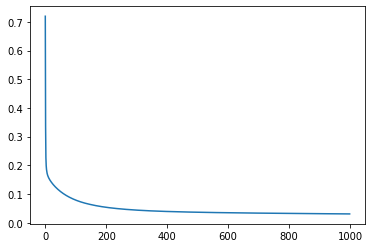

In [22]:
plt.plot(mlp.loss_hist);

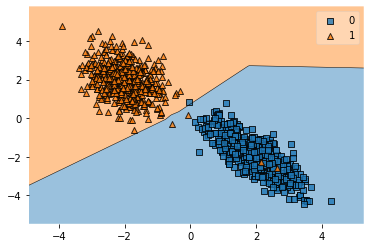

In [23]:
plot_decision_regions(x , y , mlp);

## **Make Regression**

In [223]:
x , y = make_regression(n_samples=1000  , n_features=2 , n_informative=2 ,  random_state=0)
x.shape , y.shape

((1000, 2), (1000,))

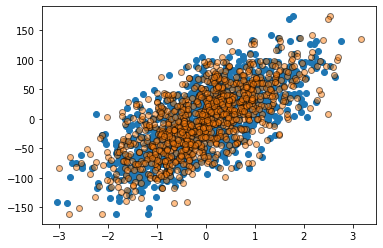

In [224]:
plt.scatter(x[: , 0] , y );
plt.scatter(x[: , 1] , y , alpha=0.5 , ec='k');

In [227]:
scaler = StandardScaler()
y = scaler.fit_transform(y[: , None])

In [228]:
mlp2 = MLP([4] , output_activation='linear' , eta=0.1 , random_state=3 , loss_fn=mse)

In [230]:
mlp2.fit(x , y)

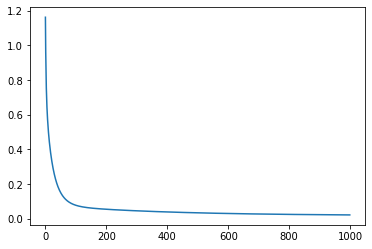

In [231]:
plt.plot(mlp2.loss_hist);

In [232]:
y_hat = mlp2.predict(x)

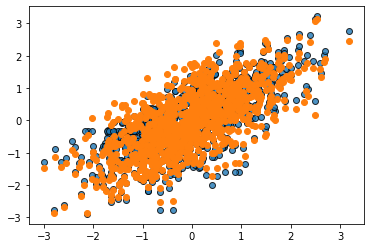

In [238]:
plt.scatter(x[: , 1] , y_hat , alpha=0.8 , ec='k');
plt.scatter(x[: , 1] , y);